In [9]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
np.unique(y)
type(y)

numpy.ndarray

## cross validation using train_test_split in sklearn.model_selection


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Feature scaling 
Feature scaling gives optimal performance by standardizing/normalizing different features.
StandardScaler is a class in preprocessing module of sklearn package to perform feature scaling.

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# perform the standardization on X_train dataset using the fit method. This calculates the sample mean and stdev of
# each feature. 

sc.fit(X_train)

# transform uses the sample mean and stdev calculated by fit to standardize each feature using (xi-u)/stdev.
# same parameters are used to transform the test data so it can be compared with the training dataset.

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)




## Applying Perceptron model

In [22]:
from sklearn.linear_model import Perceptron

# creating an object of Perceptron class with specific parameters. random_state is set to 0 to achieve reproducibility
# if more than one epochs are performed on the training dataset.

ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Predicting the outcomes on test data
After applying the model on the training dataset, we will make predictions about the test data. We will also calculate missclassified outcomes. 

In [28]:
y_pred = ppn.predict(X_test_std)
print("Missclassified samples: %d" % (y_test != y_pred).sum())

Missclassified samples: 5


The accuracy of the model can be calculate as follows:
1-(5/45) * 100 = 88.9%
Another method is metric module which is used below:

## metric module
metric module in sklearn offers a large variety of performance metrics for calculting the accuracy of a model.

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.89


## Plotting decision boundaries

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
test_idx=None, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


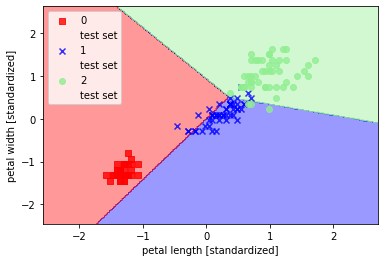

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Logistic Regression
is one of the most frequently used linear classifiers in the industry.

**Odds ratio** is the odds in favor an event is given as p/(1-p).

**logit** function is the log of the odds ratio: logit(p) = log(p/(1-p))

The probability that a particular sample belongs to a certain class can be obtained taking the inverse of the logit function which is named logistic or Sigmoid function. The later name due to its S-shape curve. 
phi(z) = 1/(1-exp(-z)).

A sigmoid function takes real number values as input and transforms them to values in the range (0,1) with an intercept at 0.5.

The following code shows how to plot a sigmoid function. 

The output of the sigmoid function is then interpreted as the probability of particular sample belonging to class 1, given its features x parameterized by the weights w. For example, if we compute ()0.8z= for a particular flower sample, it means that the chance that this sample is an Iris-Versicolor flower is 80 percent. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as ()()0|;10|;0.2PyPy==−==xwxw or 20 percent. The predicted probability can then simply be converted into a binary outcome via a quantizer (unit step function):

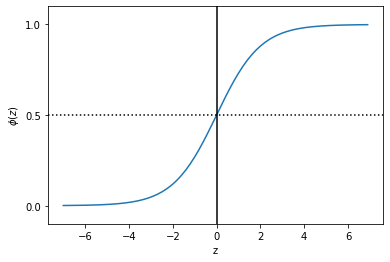

In [41]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> def sigmoid(z):
...        return 1.0 / (1.0 + np.exp(-z))
>>> z = np.arange(-7, 7, 0.1)
>>> phi_z = sigmoid(z)
>>> plt.plot(z, phi_z)
>>> plt.axvline(0.0, color='k')
>>> plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
>>> plt.axhline(y=0.5, ls='dotted', color='k')
>>> plt.yticks([0.0, 0.5, 1.0])
>>> plt.ylim(-0.1, 1.1)
>>> plt.xlabel('z')
>>> plt.ylabel('$\phi (z)$')
>>> plt.show()

## Applying Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a s

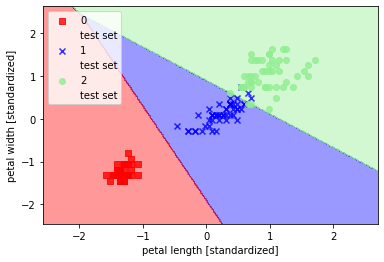

In [50]:
>>> from sklearn.linear_model import LogisticRegression
>>> lr = LogisticRegression(C=1000.0, random_state=0)
>>> lr.fit(X_train_std, y_train)
>>> plot_decision_regions(X_combined_std,
... y_combined, classifier=lr,
... test_idx=range(105,150))
>>> plt.xlabel('petal length [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()


Consequently, decreasing the value of the inverse regularization parameter C means that we are increasing the regularization strength, which we can visualize by plotting the L2 regularization path for the two weight coefficients.
By executing the following code, we fitted ten logistic regression models with different values for the inverse-regularization parameter C. For the purposes of illustration, we only collected the weight coefficients of the class 2 vs. all classifier. Remember that we are using the OvR technique for multiclass classification.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


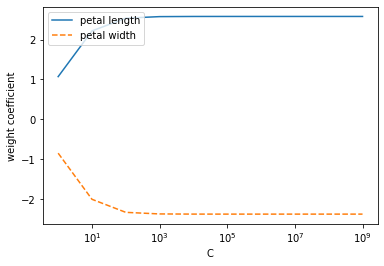

In [54]:
>>> weights, params = [], []
>>> for c in np.arange(0, 10):
        lr = LogisticRegression(C=10**c, random_state=0)
        lr.fit(X_train_std, y_train)
        weights.append(lr.coef_[1])
        params.append(10**c)
>>> weights = np.array(weights)
>>> plt.plot(params, weights[:, 0],
... label='petal length')
>>> plt.plot(params, weights[:, 1], linestyle='--',
... label='petal width')
>>> plt.ylabel('weight coefficient')
>>> plt.xlabel('C')
>>> plt.legend(loc='upper left')
>>> plt.xscale('log')
>>> plt.show()

As we can see in the resulting plot, the weight coefficients shrink if we decrease the parameter C, that is, if we increase the regularization strength.